## Telecom Customer Churn Analysis

Welcome to the Telecom Customer Churn Analysis! This analysis delves into customer churn data from a telecom company with the primary objective of identifying patterns, trends, and factors that drive customer churn. By uncovering these insights, the company can develop targeted strategies to enhance customer retention and minimize churn rates.

This notebook focuses on three key components:

Data Preprocessing: Preparing the dataset for analysis by cleaning and organizing the data.
Exploratory Data Analysis (EDA): Unveiling trends and relationships within the data.
Visualizations: Creating clear and impactful visuals to support the findings.
Let’s dive in to uncover actionable insights and help the telecom company build stronger relationships with its customers!

In [8]:
### This code displays the first few rows of the dataset to understand its structure.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
### This code is used to get an overview of the dataset, including column types and non-null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [11]:
### This code is used to get an overview of the dataset, including column types and non-null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
### This code checks for missing values in the dataset to handle data quality issues.
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
### This code provides statistical summaries of numerical columns in the dataset.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [15]:
def conv(value):
    if value == 1:
        return "yes"
    else: 
        return "no"
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [16]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


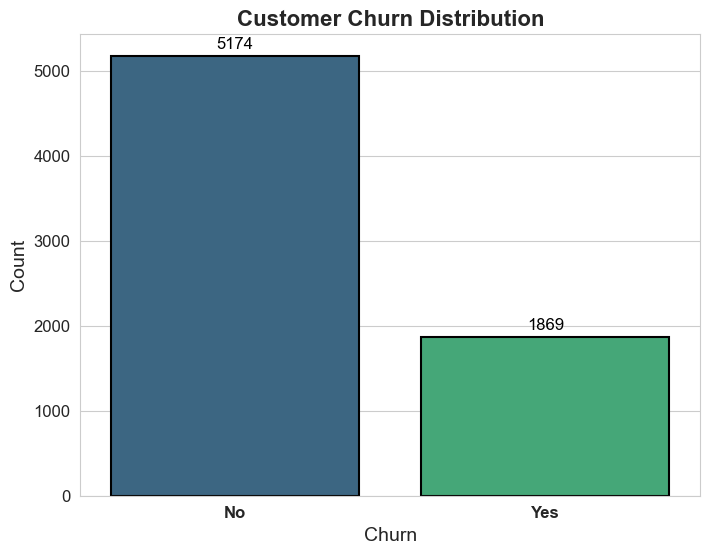

In [19]:
### This code displays the plotted visualizations.
sns.set_style("whitegrid")


plt.figure(figsize=(8, 6))
ax = sns.countplot(
    x=df['Churn'], 
    hue=df['Churn'],  
    data=df, 
    palette="viridis",  
    edgecolor="black",  
    linewidth=1.5,
    legend=False 
)


for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3)


plt.title("Customer Churn Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Churn", fontsize=14)
plt.ylabel("Count", fontsize=14)


plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)


plt.show()

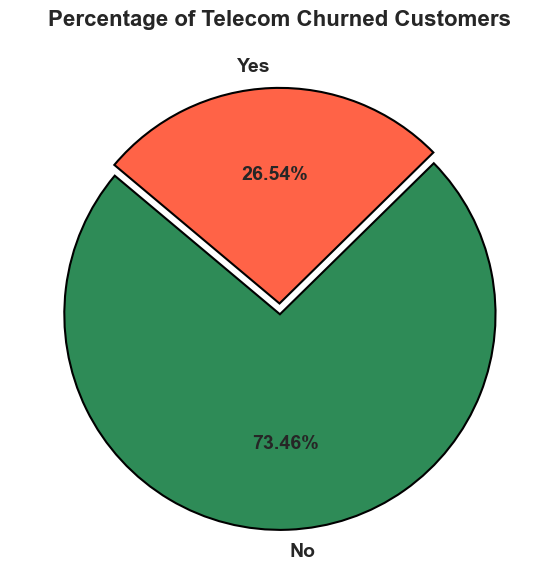

In [20]:
### This code displays the plotted visualizations.
gb = df.groupby("Churn").agg({'Churn': "count"})

colors = ['#2E8B57', '#FF6347']  

plt.figure(figsize=(7, 7))
plt.pie(
    gb['Churn'], 
    labels=gb.index, 
    autopct="%1.2f%%", 
    startangle=140,  
    colors=colors,   
    explode=(0.05, 0),  
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},  
    textprops={'fontsize': 14, 'fontweight': 'bold'}  
)


plt.title("Percentage of Telecom Churned Customers", fontsize=16, fontweight='bold', fontname='Sans Serif')


plt.show()

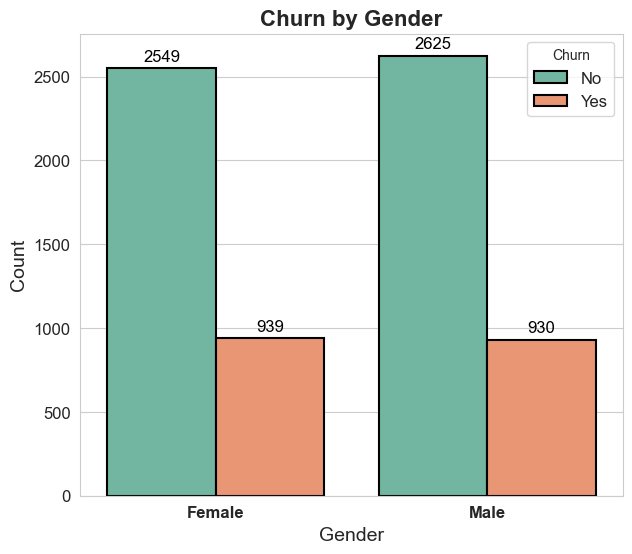

In [22]:
### This code displays the plotted visualizations.

sns.set_style("whitegrid")

plt.figure(figsize=(7, 6))
ax = sns.countplot(
    x="gender", 
    data=df, 
    hue="Churn", 
    palette="Set2",  
    edgecolor="black",  
    linewidth=1.5
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3)

plt.title("Churn by Gender", fontsize=16, fontweight='bold')
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)


plt.legend(title="Churn", loc="upper right", fontsize=12)

plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

plt.show()

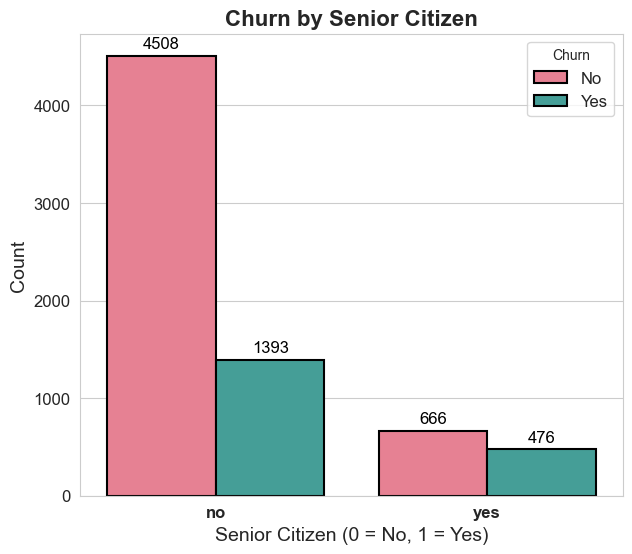

In [23]:
### This code displays the plotted visualizations.

sns.set_style("whitegrid")

plt.figure(figsize=(7, 6))
ax = sns.countplot(
    x="SeniorCitizen", 
    data=df, 
    hue="Churn", 
    palette="husl",  
    edgecolor="black",  
    linewidth=1.5
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3)


plt.title("Churn by Senior Citizen", fontsize=16, fontweight='bold')
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.legend(title="Churn", loc="upper right", fontsize=12)


plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)


plt.show()

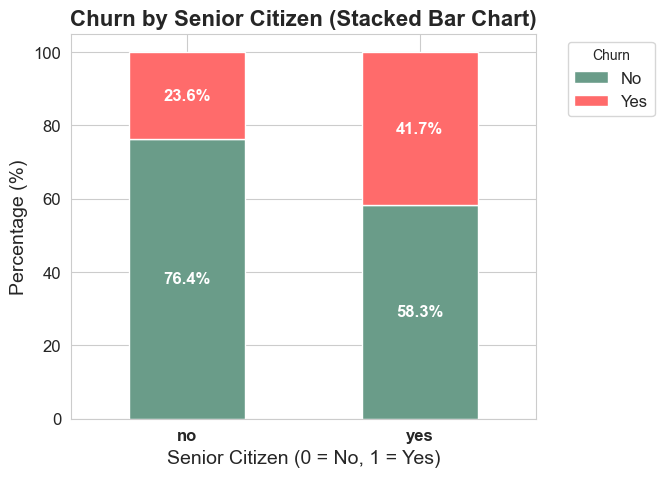

In [24]:
### This code displays the plotted visualizations.
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

fig, ax = plt.subplots(figsize=(6, 5))

total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#6a9c89', '#ff6b6b'])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=12, fontweight='bold', color='white')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)', fontsize=16, fontweight='bold')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=0, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), fontsize=12)

plt.show()

C:\Users\bhavy\AppData\Local\Temp\ipykernel_25964\1195934864.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Churn", fontsize=12, loc="upper right")


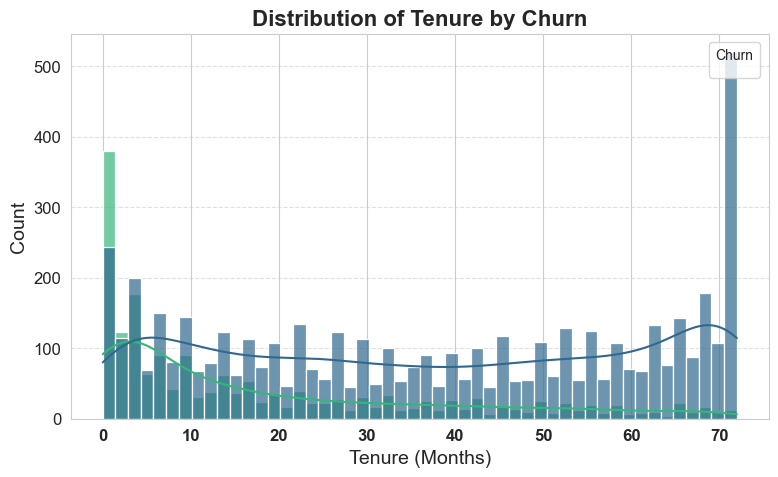

In [28]:
plt.figure(figsize=(9, 5))

ax = sns.histplot(
    x="tenure", 
    data=df, 
    bins=50,  
    hue="Churn", 
    palette="viridis",  
    kde=True,  
    alpha=0.7  
)


plt.title("Distribution of Tenure by Churn", fontsize=16, fontweight='bold')
plt.xlabel("Tenure (Months)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)


ax.legend(title="Churn", fontsize=12, loc="upper right")

plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

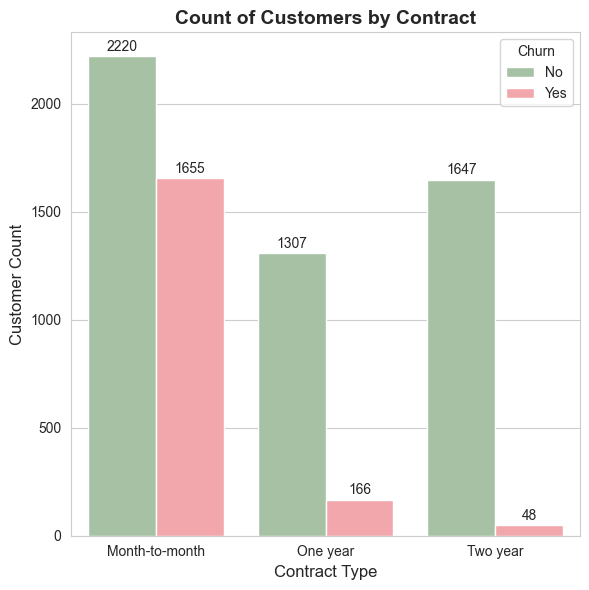

In [34]:
### This code displays the plotted visualizations.

plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")


custom_palette = ["#A3C6A0" , "#FF9AA2"]  


ax = sns.countplot(x="Contract", data=df, hue="Churn", palette=custom_palette)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)


plt.title("Count of Customers by Contract", fontsize=14, fontweight="bold")
plt.xlabel("Contract Type", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)


plt.tight_layout()
plt.show()

In [63]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

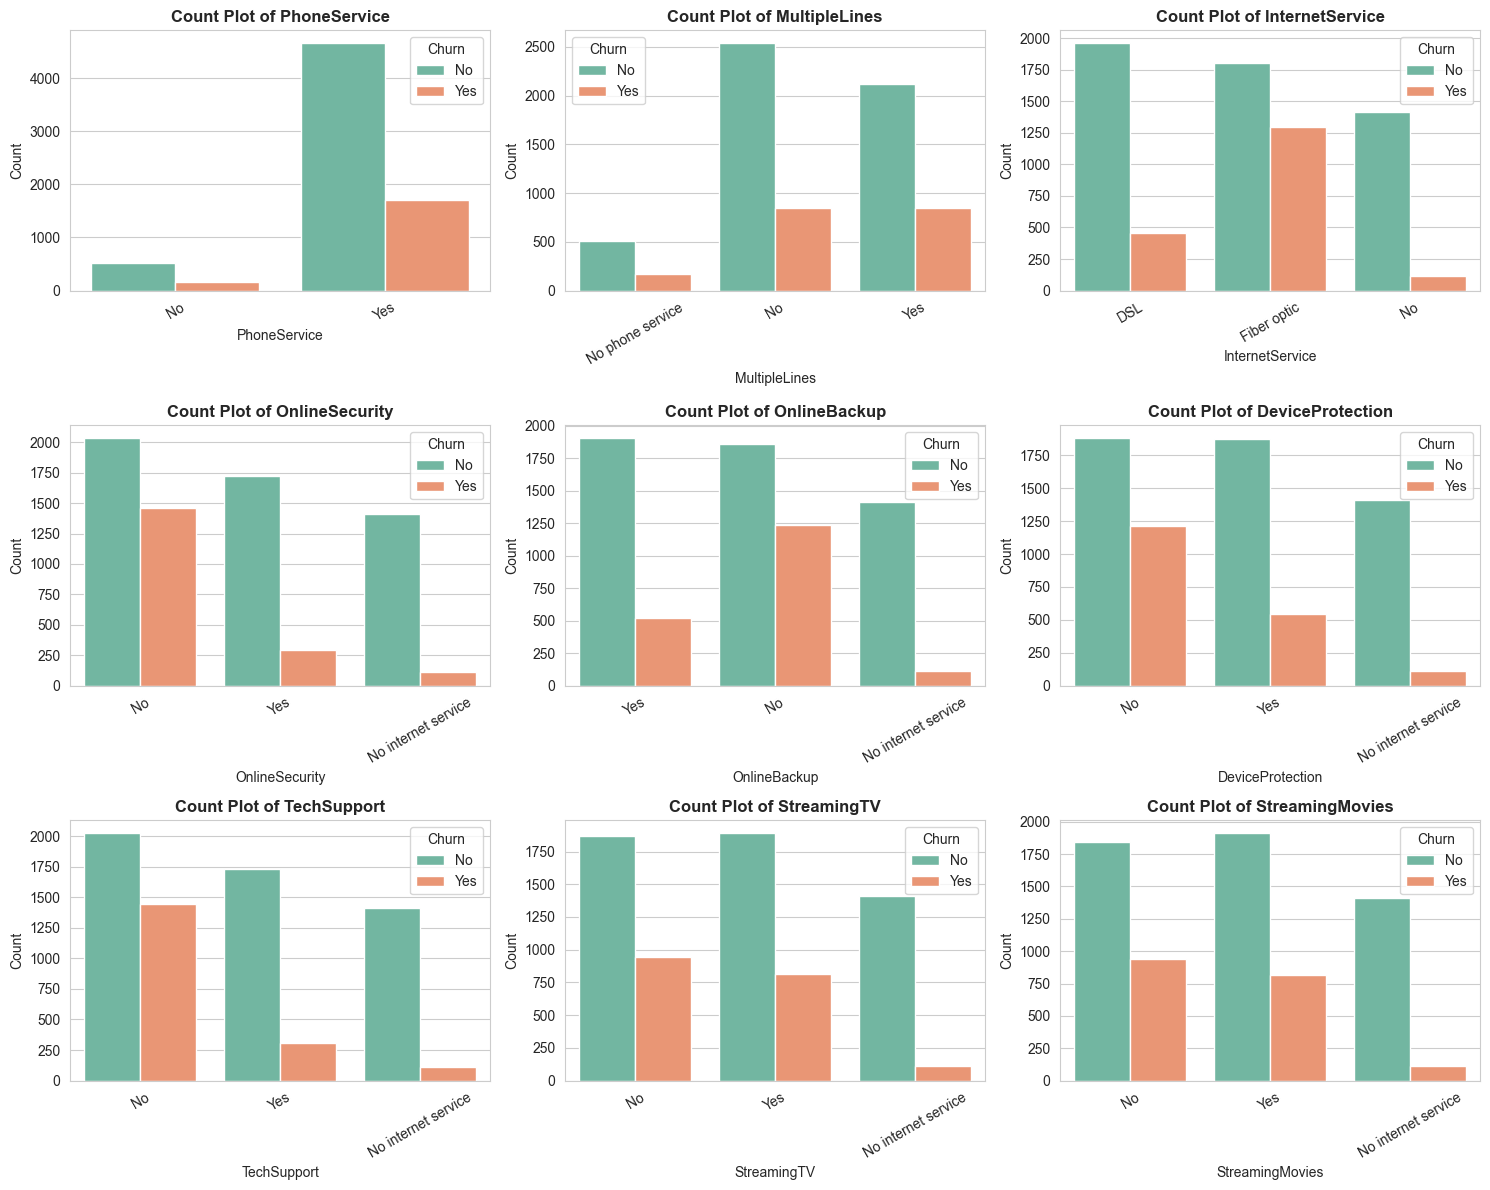

In [35]:
### This code displays the plotted visualizations.

columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue="Churn", palette="Set2")
    axes[i].set_title(f'Count Plot of {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].tick_params(axis='x', rotation=30)  
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()

plt.show()

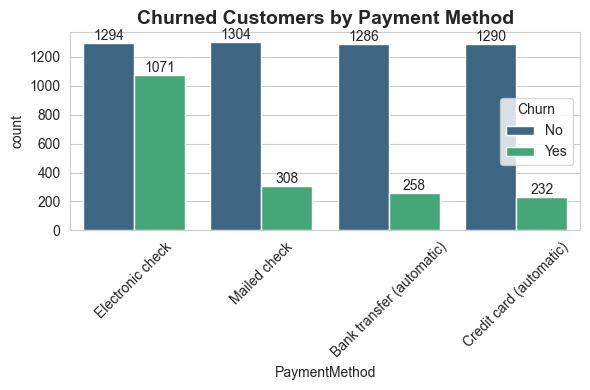

In [36]:
### This code displays the plotted visualizations.

plt.figure(figsize=(6, 6))
ax = sns.countplot(x="PaymentMethod", data=df, hue="Churn", palette="viridis")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
plt.title("Churned Customers by Payment Method", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
